In [2]:
from pseudowalls import *

In [2]:
O = Chern_Char(1,0)
O

In [3]:
O1 = exponential_chern(1,1)
O1

In [4]:
O1inv = exponential_chern(-1,1)
O1inv

In [5]:
O2 = O1 * O1
O2

In [6]:
O_x = Chern_Char(0,1)
O_x

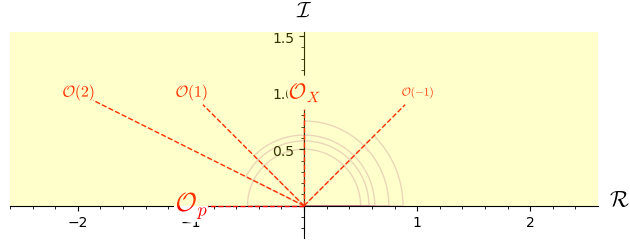

In [7]:
def plot_central_charge(chern, name, argument = None, radius = None):
    Z = stability.Mumford().central_charge(chern)
    x = Z.real()
    y = Z.imag()
    
    if not argument:
        argument = arctan(y/x) if x != 0 else pi / 2
        if argument <= 0:
            argument += pi
            
    if not radius:
        radius = (pi-argument/2)/pi
    
    return point(
        Z,
        marker = "o",
        size = 600,
        rgbcolor = "white",
        #markeredgecolor = "purple",
        zorder = 100
    ) + point(
        Z,
        marker = name,
        size = 500,
        rgbcolor = "red",
        zorder = 101
    ) + line(
        (0, Z),
        rgbcolor = "red",
        linestyle = "dashed",
        zorder = 99
    ) + disk(
        (0,0),
        float(radius),
        (0, float(argument)),
        alpha=.2,
        fill=False,
        thickness=1,
        rgbcolor="purple"
    )

p = sum(
    plot_central_charge(chern, name)
    for chern, name in [
        (O1, r"$\mathcal{O}(1)$"),
        (O, r"$\mathcal{O}_X$"),
        (O1inv, r"$\mathcal{O}(-1)$"),
        (O2, r"$\mathcal{O}(2)$"),
        (O_x, r"$\mathcal{O}_p$")
    ]
)

xmax = (2.5)
xmin = (-2.5)
ymin = (-0.25)
ymax = (1.5)
aspect_ratio = (1)

p += polygon(
    [
        (xmax + 1,0),
        (xmin - 1,0),
        (xmin - 1,ymax + 1),
        (xmax + 1,ymax + 1)
    ],
    rgbcolor = "yellow",
    alpha = 0.2,
    zorder = 102
)

p.xmax(xmax)
p.xmin(xmin)
p.ymin(ymin)
p.ymax(ymax)
p.set_aspect_ratio(aspect_ratio)

p.axes_labels([r"$\mathcal{R}$",r"$\mathcal{I}$"])
p.show()

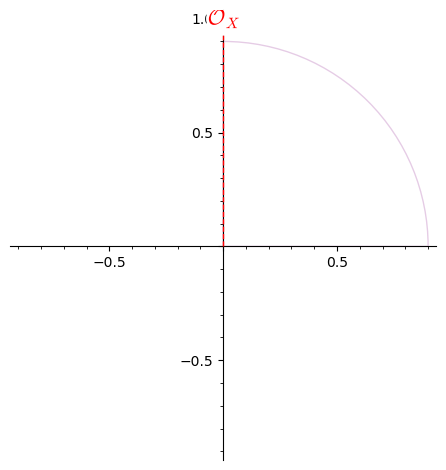

In [8]:
plot_central_charge(O, r"$\mathcal{O}_X$", radius = 0.9)

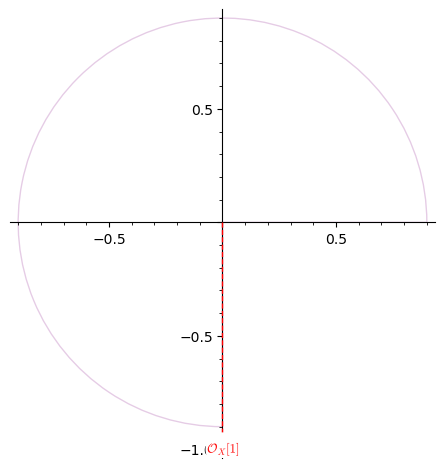

In [9]:
plot_central_charge(-O, r"$\mathcal{O}_X[1]$", argument=3*pi/2, radius = 0.9)

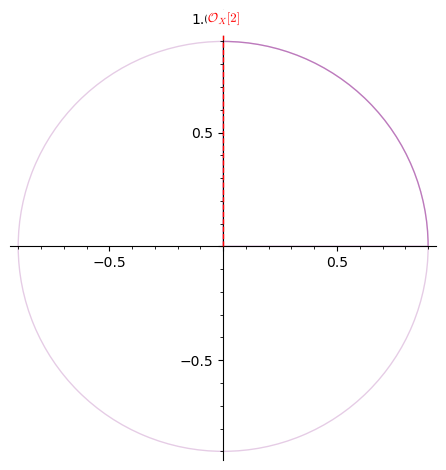

In [10]:
plot_central_charge(O, r"$\mathcal{O}_X[2]$", argument=2*pi, radius = 0.9) + \
disk(
    (0,0),
    0.9,
    (0, float(pi/2)),
    alpha=.4,
    fill=False,
    thickness=1,
    rgbcolor="purple"
)

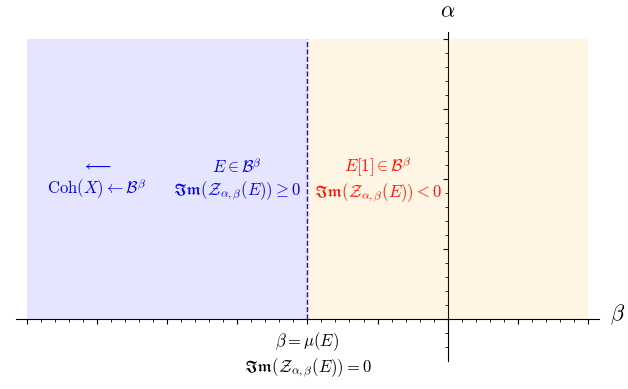

In [18]:
ymin = 0
ymax = 2
xmin = -3
xmax = 1

mu = -1

p = line(
    [(mu,0), (mu,ymax)],
    linestyle = "dashed",
) + text(
r"""$\beta = \mu(E)$
$\mathfrak{Im}(\mathcal{Z}_{\alpha,\beta}(E)) = 0$""",
    (mu, -0.25),
    fontsize = "large",
    rgbcolor = "black"
) + text(
r"""$\longleftarrow$
$\mathrm{Coh}(X) \leftarrow \mathcal{B}^\beta$""",
    (-2.5,1),
    fontsize = "large"
) + text(
r"""$E \in \mathcal{B}^\beta$
$\mathfrak{Im}(\mathcal{Z}_{\alpha,\beta}(E)) \geq 0$""",
    (-1.5,1),
    fontsize = "large"
) + text(
r"""$E[1] \in \mathcal{B}^\beta$
$\mathfrak{Im}(\mathcal{Z}_{\alpha,\beta}(E)) < 0$""",
    (-0.5,1),
    fontsize = "large",
    rgbcolor = "red"
) + polygon(
    [
        (mu,0),
        (xmin,0),
        (xmin,ymax),
        (mu,ymax)
    ],
    rgbcolor = "blue",
    alpha = 0.1,
    zorder = 102
) + polygon(
    [
        (xmax,0),
        (mu,0),
        (mu,ymax),
        (xmax,ymax)
    ],
    rgbcolor = "orange",
    alpha = 0.1,
    zorder = 102
)

p.axes_labels([r"$\beta$",r"$\alpha$"])
p.tick_label_color("white")
p.show()

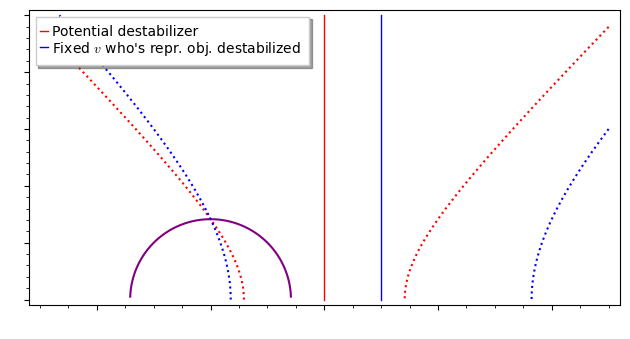

In [32]:
v = Chern_Char(1,0,-1)
u = Chern_Char(1,1,-3)

ts = stability.Tilt()
mu = stability.Mumford().slope

p = implicit_plot(
    ts.wall_eqn(u,v)/ts.alpha == 0,
    (ts.beta, -5, 5),
    (ts.alpha, 0, 5),
    rgbcolor = "purple",
) + implicit_plot(
    ts.degree(v) == 0,
    (ts.beta, -5, 5),
    (ts.alpha, 0, 5),
    rgbcolor = "red",
    linestyle = "dotted",
) + implicit_plot(
    ts.degree(u) == 0,
    (ts.beta, -5, 5),
    (ts.alpha, 0, 5),
    linestyle = "dotted",
) + line(
    [(mu(v),0),
    (mu(v),5)],
    rgbcolor = "red",
    legend_label = "Potential destabilizer",
) + line(
    [(mu(u),0),
    (mu(u),5)],
    legend_label = "Fixed $v$ who's repr. obj. destabilized",
)

p.tick_label_color("white")
p.show()

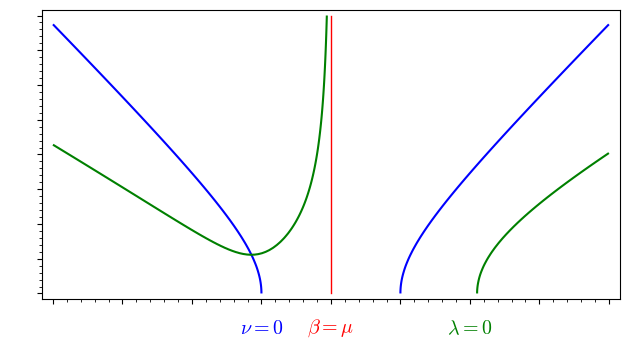

In [67]:
plot_range = 4
v = Chern_Char(2,0,-1,1)
lam = stability.Lambda(s=1/3)
Theta = lam.rank(v)
Gamma = lam.degree(v)
mu = stability.Mumford().slope(v)
p = (
implicit_plot(Theta, (lam.beta, -plot_range,plot_range), (lam.alpha, 0, plot_range))
+ implicit_plot(Gamma, (lam.beta, -plot_range,plot_range), (lam.alpha, 0, plot_range), rgbcolor="green")
+ line([(mu,0),(mu,plot_range)], rgbcolor = "red")
+ text(r"$\beta=\mu$", (mu, -0.5), fontsize="x-large", rgbcolor="red")
+ text(r"$\nu = 0$", (mu-1, -0.5), fontsize="x-large", rgbcolor="blue")
+ text(r"$\lambda = 0$", (mu+2, -0.5), fontsize="x-large", rgbcolor="green")
)
p.tick_label_color("white")
p.ymin(0)
p

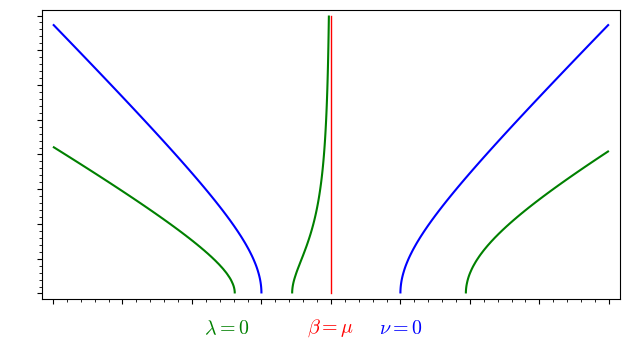

In [73]:
plot_range = 4
v = Chern_Char(2,0,-1,1/2)
lam = stability.Lambda(s=1/3)
Theta = lam.rank(v)
Gamma = lam.degree(v)
mu = stability.Mumford().slope(v)
p = (
implicit_plot(Theta, (lam.beta, -plot_range,plot_range), (lam.alpha, 0, plot_range))
+ implicit_plot(Gamma, (lam.beta, -plot_range,plot_range), (lam.alpha, 0, plot_range), rgbcolor="green")
+ line([(mu,0),(mu,plot_range)], rgbcolor = "red")
+ text(r"$\beta=\mu$", (mu, -0.5), fontsize="x-large", rgbcolor="red")
+ text(r"$\nu = 0$", (mu+1, -0.5), fontsize="x-large", rgbcolor="blue")
+ text(r"$\lambda = 0$", (mu-1.5, -0.5), fontsize="x-large", rgbcolor="green")
)
p.tick_label_color("white")
p.ymin(0)
p